# Introduction à PyTorch

Dans ce notebook, nous allons couvrir les bases de [PyTorch](https://pytorch.org/).
PyTorch est une librairie de tenseurs, comme JAX, que nous avons utilisé plus tôt dans le cours.
Par rapport à JAX, qui a un écosystème très intéressant pour l'inférence Bayésienne, PyTorch a un écosystème de _deep learning_ beaucoup plus mature, stable et complet.
Nous utiliserons PyTorch pour l'apprentissage profound et les réseaux neuronaux dans le reste du cours.
Il y a plusieurs avantages à utiliser une telle librairie lorsqu'on travaille avec des réseaux neuronaux artificiels, par exemple:

- Calcul des dérivées via la rétropropagation
- Utilisation de GPUs
- Plusieurs blocs de base requis pour implémenter différents modèles
- Plusieurs modèles sont déjà implémentés et disponibles en ligne

Tout comme avec JAX, l'interface PyTorch n'est pas trop loin de celle de NumPy dans plusieurs cas.
Il y a tout de même certaines subtilités que nous allons couvrir plus bas.

## Installation

Si ce n'est pas fait, il faut installer PyTorch. Rendez-vous sur [le site web](https://pytorch.org/). Plus bas sur la page il y a une section "Install PyTorch".
Sélectionnez les options et copiez la commande fournie à côté de "_Run this command_".
À moins que votre ordinateur n'ait un GPU pour le machine learning, cochez "CPU" dans _Compute Platform_.
Sur [Google Colab](https://colab.research.google.com/), vous pouvez utiliser CUDA 12.4 (voir [ce tutoriel](https://pytorch.org/tutorials/beginner/colab.html) pour plus de détails).

## Tenseurs

Habituellement, nous manipulons des ensembles de données via des tableaux NumPy (`np.array`).
Avec PyTorch, la structure équivalente est une _tenseur_ (`torch.tensor`)

### Création

On peut créer les tenseur à partir de listes imbriquées.

In [1]:
import torch

data = [[1, 2], [3, 3]]
data_tensor = torch.tensor(data)
print(data_tensor)

tensor([[1, 2],
        [3, 3]])


Ici, les données sont copiées vers le tenseur: modifier la liste ne modifiera pas le tenseur et vice-versa.

On peut également créer notre tenseur à partir d'un tableau NumPy en utilisant `torch.from_numpy()`.

In [2]:
import numpy as np

data_array = np.array(data)
data_tensor_np = torch.from_numpy(data_array)
print(data_tensor_np)

tensor([[1, 2],
        [3, 3]])


Quand on crée le tenseur à partir de NumPy, **les objets sont liés en mémoire**.
Ceci veut dire qu'une modification au tableau NumPy affectera aussi le tenseur PyTorch.

On peut créer une copie pour que les deux objets ne soient plus liés.
`torch.Tensor.clone()` est l'équivalent de `np.ndarray.copy()`.

In [3]:
data_tensor_cloned = data_tensor_np.clone()
data_array[0, 0] = 100
print(data_array)  # modifié
print(data_tensor_np)  # modifié
print(data_tensor_cloned)  # original

[[100   2]
 [  3   3]]
tensor([[100,   2],
        [  3,   3]])
tensor([[1, 2],
        [3, 3]])


La majorité des options pour créer un tableau NumPy sont répliquées par PyTorch. Que ce soit avec des constantes ou des nombres aléatoires.

In [4]:
zeros = torch.zeros(2, 3)
ones = torch.ones_like(zeros)
rand_vals = torch.rand_like(ones)  # Uniforme [0, 1)
rand_norm = torch.randn_like(ones)  # Distribution normale
rand_ints = torch.randint_like(ones, 10)  # Entiers [0, 10)

print("Zeros:", zeros)
print("Zeros shape:", zeros.shape)
print("Ones:", ones)
print("Uniforme:", rand_vals)
print("Normal:", rand_norm)
print("Entiers:", rand_ints)

Zeros: tensor([[0., 0., 0.],
        [0., 0., 0.]])
Zeros shape: torch.Size([2, 3])
Ones: tensor([[1., 1., 1.],
        [1., 1., 1.]])
Uniforme: tensor([[0.4413, 0.4307, 0.2645],
        [0.5352, 0.9994, 0.9278]])
Normal: tensor([[ 0.4758, -1.0141,  1.0432],
        [ 0.2136,  0.2338, -0.0759]])
Entiers: tensor([[5., 3., 7.],
        [7., 1., 5.]])


### Opérations

Les opérations mathématiques sont effectuées de manière similaire à NumPy: élément par élément.

In [5]:
print(ones * 5)
print(rand_norm * rand_ints)

tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[ 2.3791, -3.0424,  7.3024],
        [ 1.4949,  0.2338, -0.3794]])


Les opérations logiques fonctionnent également, mais il faut convertir vers un type `bool`:

In [6]:
# Erreur:
try:
    print(ones | zeros)
except Exception as e:
    print(f"Erreur détectée: {e}")

# On peut changer le type
print(ones.to(torch.bool) | zeros.to(torch.bool))
print(ones.to(torch.bool) & zeros.to(torch.bool))

Erreur détectée: "bitwise_or_cpu" not implemented for 'Float'
tensor([[True, True, True],
        [True, True, True]])
tensor([[False, False, False],
        [False, False, False]])


On peut aussi convertir un tensor vers un tableau NumPy

In [7]:
print(type(rand_vals))
print(rand_vals.numpy())
print(type(rand_vals.numpy()))

<class 'torch.Tensor'>
[[0.44129026 0.43069208 0.2644899 ]
 [0.53517264 0.9993966  0.92776936]]
<class 'numpy.ndarray'>


### Matplotlib

Les tenseurs PyTorch sont directement compatibles avec Matplotlib.

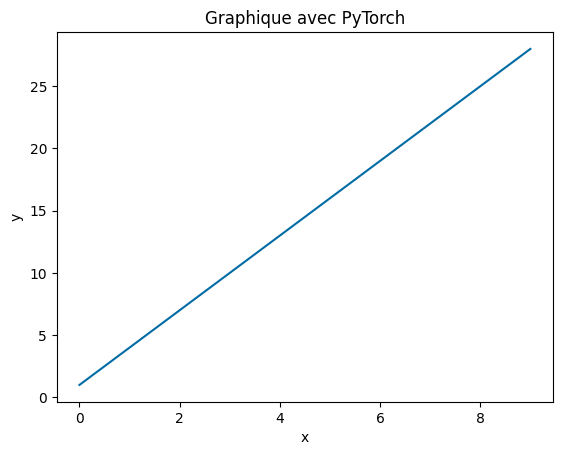

In [8]:
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")

x = torch.arange(10)
y = 3 * x + 1
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphique avec PyTorch")
plt.show()

### Utilisation de GPUs

Comme mentionné plus haut, un des principaux avantages des tenseurs PyTorch est leur compatibilité avec les GPUs,
qui permettent d'accélérer les calculs grâce à la parallélisation.
Si comme moi votre ordinateur n'a pas accès à un GPU, la cellule suivante affichera "`Pas de GPU :(`".

In [9]:
# Si on avait un GPU, on pourrait envoyer le tenseur sur les GPU
if torch.cuda.is_available():
    print("Copié sur CUDA")
    x_data_gpu = data_tensor.to("cuda")
else:
    print("Pas de GPU :(")

Pas de GPU :(


Faire cette petite opération pour chaque tenseur n'est pas très pratique...
Une façon simple de ne vérifier qu'une seule fois la disponibilité d'un GPU est de créer une variable `device` qui garde cette information.
Ensuite, on peut créer les tenseurs en leur assignant une _device_.

In [10]:
# On peut spécifier une seule fois et utiliser ensuite
device = "cuda" if torch.cuda.is_available() else "cpu"

# On peut spécifier le GPU à la création au lieu d'utiliser `.to()`
x_with_device = torch.rand(2, 2, device=device)
# Ou encore envoyer un tenseur existant
data_tensor.to(device)

print(x_with_device)
print(x_with_device.device)
print(x_with_device.is_cuda)

tensor([[0.0581, 0.2052],
        [0.6385, 0.7275]])
cpu
False


## Autodérivation avec `torch.autograd`

Comme nous avons avec JAX, un avantage des libraires de tenseur est le calcul automatique des gradients via l'autodérivation.
Pour l'apprentissage profond, cette fonctionnalité est essentielle lors de l'entraînement.
L'autodérivation et la rétropropagation sont disponibles dans le module `autograd` de PyTorch.

### Suivre les gradients avec `requires_grad` et `grad_fn`

Par défaut, un tenseur créé avec directement avec `torch` ne gardera pas de trace des gradients.

In [11]:
x_nograd = torch.linspace(0.0, 2 * torch.pi, steps=25)  # pas de gradient
print("x_nograd:", x_nograd)
print("Requires grad:", x_nograd.requires_grad)

x_nograd: tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832])
Requires grad: False


Il faut activer `autograd` explicitement avec `requires_grad=True`.

In [12]:
x = torch.linspace(0.0, 1.0, steps=50, requires_grad=True)
print("x:", x)
print("Requires grad:", x.requires_grad)

x: tensor([0.0000, 0.0204, 0.0408, 0.0612, 0.0816, 0.1020, 0.1224, 0.1429, 0.1633,
        0.1837, 0.2041, 0.2245, 0.2449, 0.2653, 0.2857, 0.3061, 0.3265, 0.3469,
        0.3673, 0.3878, 0.4082, 0.4286, 0.4490, 0.4694, 0.4898, 0.5102, 0.5306,
        0.5510, 0.5714, 0.5918, 0.6122, 0.6327, 0.6531, 0.6735, 0.6939, 0.7143,
        0.7347, 0.7551, 0.7755, 0.7959, 0.8163, 0.8367, 0.8571, 0.8776, 0.8980,
        0.9184, 0.9388, 0.9592, 0.9796, 1.0000], requires_grad=True)
Requires grad: True


Ensuite, toutes les opérations effectuées sur `x` tracerons le gradient.

In [13]:
phase = 2 * torch.pi * x
print("phase:", phase)
print("phase.grad_fn:", phase.grad_fn)

phase: tensor([0.0000, 0.1282, 0.2565, 0.3847, 0.5129, 0.6411, 0.7694, 0.8976, 1.0258,
        1.1541, 1.2823, 1.4105, 1.5387, 1.6670, 1.7952, 1.9234, 2.0517, 2.1799,
        2.3081, 2.4363, 2.5646, 2.6928, 2.8210, 2.9493, 3.0775, 3.2057, 3.3339,
        3.4622, 3.5904, 3.7186, 3.8468, 3.9751, 4.1033, 4.2315, 4.3598, 4.4880,
        4.6162, 4.7444, 4.8727, 5.0009, 5.1291, 5.2574, 5.3856, 5.5138, 5.6420,
        5.7703, 5.8985, 6.0267, 6.1550, 6.2832], grad_fn=<MulBackward0>)
phase.grad_fn: <MulBackward0 object at 0x7f4e2020f760>


On voit ici que PyTorch a enregistré que la fonction donnant le gradient pour `y` est une multiplication.
La même chose se produit pour de nouvelles opérations

In [14]:
y = torch.sin(phase)
print("y:", y)
print("y.grad_fn:", y.grad_fn)

y: tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4554e-01,
        -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
        -9.7493e-01, -9.9538e-01, -9.9949e-01, -9.8718e-01, -9.5867e-01,
        -9.1441e-01, -8.5514e-01, -7.8183e-01, -6.9568e-01, -5.9811e-01,
        -4.9072e-01, -3.7527e-01, -2.5365e-01, -1.2788e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)
y.grad_fn: <SinBackward0 object at 0x7f4e20056ec0>


Remarquez qu'ici seule la dernière opération est affichée.
Il est cependant possible de remonter la chaîne des opérations:

In [15]:
print("y.grad_fn:", y.grad_fn)
print("y.grad_fn.next_functions:", y.grad_fn.next_functions)
print("Next encore:", y.grad_fn.next_functions[0][0].next_functions)
print("Next encore (2x):", y.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)

y.grad_fn: <SinBackward0 object at 0x7f4e1fea3700>
y.grad_fn.next_functions: ((<MulBackward0 object at 0x7f4e1fea3ee0>, 0),)
Next encore: ((<AccumulateGrad object at 0x7f4e1fea3ee0>, 0), (None, 0))
Next encore (2x): ()


Lorsqu'on atteint `AccumulatedGrad`, la chaîne est terminée (nous sommes revenus à `x`).

Même les opérations qui ne sont pas directement de l'arithmétique, par exemple une copie avec `x.clone()`, peuvent être suivies par `autograd`.

In [16]:
print(y.clone())

tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4554e-01,
        -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
        -9.7493e-01, -9.9538e-01, -9.9949e-01, -9.8718e-01, -9.5867e-01,
        -9.1441e-01, -8.5514e-01, -7.8183e-01, -6.9568e-01, -5.9811e-01,
        -4.9072e-01, -3.7527e-01, -2.5365e-01, -1.2788e-01,  1.7485e-07],
       grad_fn=<CloneBackward0>)


Par contre, les tenseurs qui utilisent `requires_grad` ne sont pas compatible avec Matplotlib et NumPy...

Oups... Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.


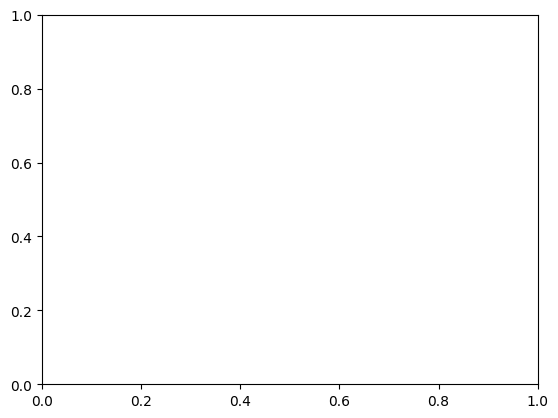

In [17]:
try:
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Graphique avec PyTorch")
    plt.show()
except Exception as e:
    print("Oups...", e)

Pour régler ce problème, il suffit de "détacher" les gradients.
Cette fonction retourne un nouveau tenseur avec les mêmes valeurs, mais sans `requires_grad`.

In [18]:
print(y.detach())

tensor([ 0.0000e+00,  1.2788e-01,  2.5365e-01,  3.7527e-01,  4.9072e-01,
         5.9811e-01,  6.9568e-01,  7.8183e-01,  8.5514e-01,  9.1441e-01,
         9.5867e-01,  9.8718e-01,  9.9949e-01,  9.9538e-01,  9.7493e-01,
         9.3847e-01,  8.8660e-01,  8.2017e-01,  7.4028e-01,  6.4823e-01,
         5.4553e-01,  4.3388e-01,  3.1511e-01,  1.9116e-01,  6.4070e-02,
        -6.4070e-02, -1.9116e-01, -3.1511e-01, -4.3388e-01, -5.4554e-01,
        -6.4823e-01, -7.4028e-01, -8.2017e-01, -8.8660e-01, -9.3847e-01,
        -9.7493e-01, -9.9538e-01, -9.9949e-01, -9.8718e-01, -9.5867e-01,
        -9.1441e-01, -8.5514e-01, -7.8183e-01, -6.9568e-01, -5.9811e-01,
        -4.9072e-01, -3.7527e-01, -2.5365e-01, -1.2788e-01,  1.7485e-07])


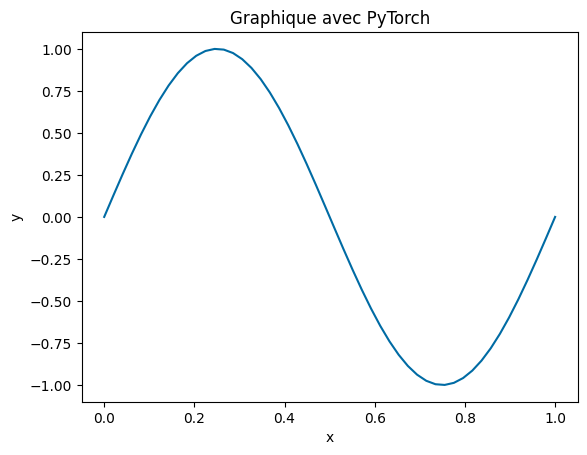

In [19]:
plt.plot(x.detach(), y.detach())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphique avec PyTorch")
plt.show()

### Calcul des gradients

Jusqu'à maintenant, nous avons emmagasiné les gradients via `requries_grad` et `grad_fn`, mais nous n'avons jamais demandé à PyTorch de calculer les gradients.
Ainsi, l'attribut `grad` de nos tenseurs n'est pas défini.

In [20]:
print("x.grad:", x.grad)

x.grad: None


Pour calculer les gradients, il suffit de prendre dernière sortie de notre chaîne d'opérations (ici `y`) et d'utiliser `.backward()`.
Cette fonction exécutera la rétropropagation.

In [21]:
y.backward(torch.ones_like(y))  # Il faut passer le gradient initial quand y n'est pas scalaire, soit 1 ici (y vs y).

Les gradients pour les "feuilles" de notre graphe de calcul sont ensuite accessible. Pour obtenir $\frac{dy}{dx}$, on utilise donc `x.grad`:

In [22]:
print("x.grad:", x.grad)

x.grad: tensor([ 6.2832,  6.2316,  6.0777,  5.8240,  5.4747,  5.0354,  4.5135,  3.9175,
         3.2572,  2.5433,  1.7877,  1.0028,  0.2014, -0.6033, -1.3981, -2.1700,
        -2.9062, -3.5947, -4.2242, -4.7843, -5.2659, -5.6610, -5.9631, -6.1673,
        -6.2703, -6.2703, -6.1673, -5.9631, -5.6610, -5.2659, -4.7843, -4.2242,
        -3.5947, -2.9062, -2.1700, -1.3981, -0.6033,  0.2014,  1.0028,  1.7877,
         2.5433,  3.2572,  3.9175,  4.5135,  5.0354,  5.4747,  5.8240,  6.0777,
         6.2316,  6.2832])


Par défaut, les gradients des étapes intermédiaires ne sont pas calculés:

In [23]:
print("phase.grad", phase.grad)

phase.grad None


/tmp/ipykernel_141621/4142524325.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print("phase.grad", phase.grad)


Nous n'en aurons pas besoin, donc peut simplement ignorer le message d'avertissement.

**Exercice: affichez sur un graphique y en fonction de x ainsi que la dérivée $\frac{dy}{dx}$**.

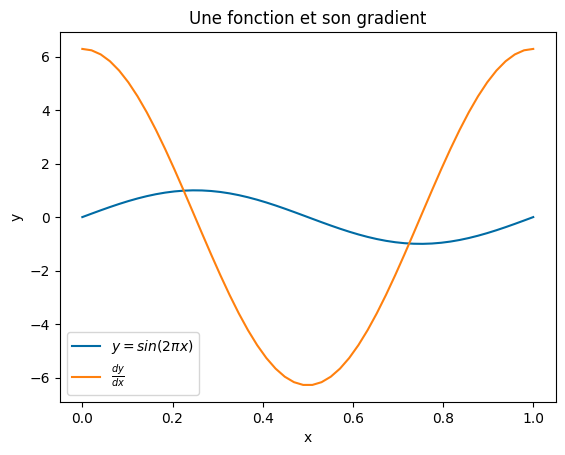

In [24]:
plt.plot(x.detach(), y.detach(), label=r"$y=sin(2 \pi x)$")
plt.plot(x.detach(), x.grad, label=r"$\frac{dy}{dx}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Une fonction et son gradient")
plt.legend()
plt.show()

## Créer un modèle PyTorch (Régression linéaire)

Une des fonctionnalités très utile de PyTorch est son interface de modélisation `torch.nn`.
Elle nous donne plusieurs blocs et fonctions utiles pour construire des réseaux neuronaux.
Par contre, elle utilise la programmation orientée objet, donc la syntaxe est un peu différente des fonctions que nous utilisons habituellement.

Une façon simple de se familiariser avec l'interface est d'implémenter une régression linéaire.

### Données simulées

Comme d'habitude, commençons par simuler des données

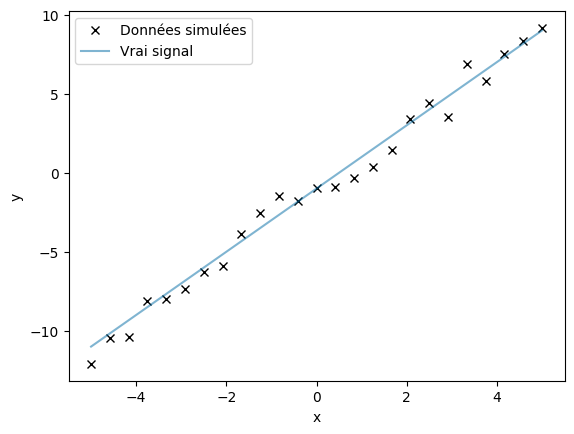

In [25]:
N = 25
noise_scale = 1.0
w_true, b_true = 2.0, -1.0
x = torch.linspace(-5, 5, steps=N)
y_true = w_true * x + b_true
y = y_true + noise_scale * torch.randn(N)

plt.plot(x, y, "kx", label="Données simulées")
plt.plot(x, y_true, label="Vrai signal", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Définition du modèle

Pour définir le modèle, il faut:

- Créer une classe qui hérite de `nn.Module`, ici `LinearModel`.
- Créer une méthode `__init__()`:
    - C'est cette méthode qui sera appelée lorsqu'on crée un modèle avec `model = LinearModel()`
    - La méthode `__init__` appelle la méthode `__init__()` de sa classe parent. On exécute ainsi le code que PyTorch implémente dans `nn.Module`.
    - C'est généralement ici que l'on définira les couches de notre réseau
- Créer une méthode `forward`. Cette méthode prend $x$ en entrée et exécute toute les couches de notre modèle.

**Rappel: `self` désigne l'objet lui-même et permet d'assigner et d'accéder aux attributs de notre classe.**

Dans notre cas, nous avons un modèle linéaire simple. Il faut donc une seule couche linéaire.
On pourrait l'implémenter manuellement, mais PyTorch a un bloc `nn.Linear` qui définit exactement ce dont nous avons besoin!
Selon [la documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html), `nn.Linear()` exécute
$$
y = x A^T + b.
$$
Tout ce que nous avons à faire, c'est de donner les dimensions d'entrée et de sortie. Les paramètre requis (poids et biais) seront créés automatiquement.
Dans notre cas nous avons $f : \mathbb{R} \rightarrow \mathbb{R}$, donc les dimensions sont de 1, le modèle sera donc équivalent à `y = a * x + b` où `a` et `b` sont des scalaires.
Pour inclure une couche linéaire dans notre modèle, il suffit donc de 1) créer cette couche dans `__init__()` et 2) exécuter cette couche dans `forward()`.
Ici, `self.linear` veut simplement dire qu'on emmagasine la couche linéaire dans une variable qui pourra être réutilisée ailleurs dans notre classe.


In [26]:
from torch import nn
class LinearModel(nn.Module):
    def __init__(self):
        # On appelle la fonction nn.Module.__init__()
        # ceci permet au code d'initialisation de PyTorch de s'exécuter
        super().__init__()
        # On crée une couche linéaire pour l'utiliser dans forward
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()

Voilà, notre modèle est créé!

Par défaut PyTorch initialise le modèle à des paramètres aléatoires.
On peut accéder à ces paramètres.

In [27]:
import pprint
pprint.pprint(list(model.named_parameters()))

[('linear.weight',
  Parameter containing:
tensor([[0.0160]], requires_grad=True)),
 ('linear.bias', Parameter containing:
tensor([0.0288], requires_grad=True))]


On peut ensuite appeler notre modèle sur un point $x$ quelconque.
PyTorch s'attend à recevoir un tenseur:

In [28]:
model(torch.tensor([0.0]))

tensor([0.0288], grad_fn=<ViewBackward0>)

Si on veut passer plusieurs points à la fois, il faut leur donner le format `(npts, ndim)`.

In [29]:
X_test = torch.tensor([[0.0, 1.0]]).T
print(X_test.shape)
model(X_test)

torch.Size([2, 1])


tensor([[0.0288],
        [0.0448]], grad_fn=<AddmmBackward0>)

Il faut donc formatter nos données `x` si on veut les passer dans notre modèle.

In [30]:
X = x.unsqueeze(1)  # Ajoute une dimension à la position ndim, donc à la 2e dimension ici
Y = y.unsqueeze(1)
ypred = model(X)
print(ypred)

tensor([[-0.0512],
        [-0.0445],
        [-0.0379],
        [-0.0312],
        [-0.0245],
        [-0.0179],
        [-0.0112],
        [-0.0045],
        [ 0.0021],
        [ 0.0088],
        [ 0.0155],
        [ 0.0221],
        [ 0.0288],
        [ 0.0355],
        [ 0.0422],
        [ 0.0488],
        [ 0.0555],
        [ 0.0622],
        [ 0.0688],
        [ 0.0755],
        [ 0.0822],
        [ 0.0888],
        [ 0.0955],
        [ 0.1022],
        [ 0.1088]], grad_fn=<AddmmBackward0>)


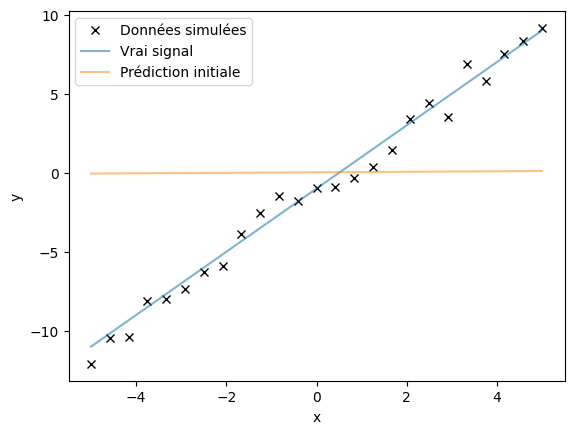

In [31]:
plt.plot(x, y, "kx", label="Données simulées")
plt.plot(x, y_true, label="Vrai signal", alpha=0.5)
plt.plot(x, ypred.detach(), label="Prédiction initiale", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Entraînement du modèle (optimisation)

Les méthodes d'optimisation PyTorch assez différentes de celles fournies par SciPy.
On les utilise typiquement de la façon suivante:

- Définition d'une fonction objectif (_loss_)
- Définition d'un optimiseur (ici `SGD`)
- On crée manuellement une boucle dans laquelle:
  - On calcule la fonction de objectif
  - On propage les gradients
  - On fait faire un pas à l'optimiseur
  - On remet les gradients à 0 avant la prochaine itération

C'est généralement une bonne idée d'emmagasiner ou d'afficher les valeurs de la fonction objectif pour vérifier son évolution.
Si elle varie encore beaucoup, on peut ajouter des itérations.

Ici, on utilise l'erreur carrée moyenne pour notre fonction objectif.

**Exercice: Complétez la fonction `loss_fn`. Assurez-vous d'utiliser `torch` pour calculer la moyenne.**

**Exercice: Créez un tableau vide de taille `niter` pour y placer les valeurs de `loss`. Affichez ces valeurs après l'entraînement pour vérifier la convergence.**

In [32]:
model = LinearModel()

def loss_fn(y, ypred):
    return torch.mean((y - ypred)**2)

# On donne les paramètres du modèle à SGD.
# L'optimiseur peut ensuite se servir de leur gradient.
optimizer = torch.optim.SGD(model.parameters())

niter = 2000

loss_vals = torch.empty(niter)
for i in range(niter):

    # On calcule la prédiction du modèle
    # et la fonction objectif
    ypred = model(X)
    loss = loss_fn(Y, ypred)


    loss.backward()  # backprop
    optimizer.step()  # un pas dans l'espace-paramètre, utilise le gradietn calculé par loss.backward()
    optimizer.zero_grad()  # on réinitialise les gradients pour ne pas les acumuler entre les itérations

    loss_vals[i] = loss

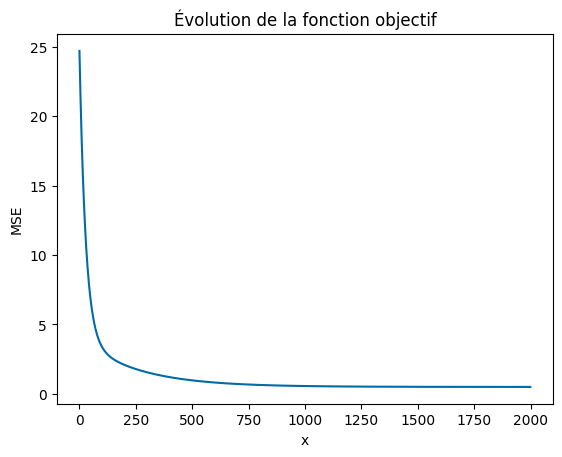

In [33]:
plt.plot(loss_vals.detach())
plt.ylabel("MSE")
plt.xlabel("x")
plt.title("Évolution de la fonction objectif")
plt.show()

Voilà, le modèle, est en entraîné!
Notez que normalement on utiliserait une partie des données comme ensemble de test et qu'on testerait la généralisation du modèle.
Nous en verrons un exemple au prochain cours.
Ici, nous allons nous contenter de cette optimisation simple.

### Prédictions avec le modèle entraîné

Maintenant que le modèle est entraîné, vérifions la valeur des paramètres la prédiction du modèle.

**Exercice: affichez la valeur des poids et un graphique montrant la prédiction du modèle.**

In [34]:
pprint.pprint(list(model.named_parameters()))

[('linear.weight',
  Parameter containing:
tensor([[2.0399]], requires_grad=True)),
 ('linear.bias', Parameter containing:
tensor([-1.1505], requires_grad=True))]


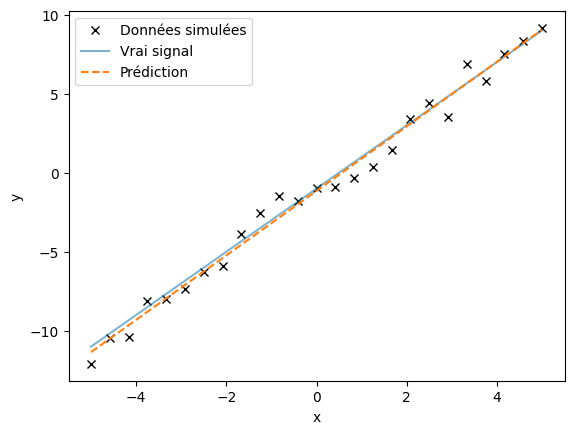

In [35]:
ypred = model(X)

plt.plot(x, Y, "kx", label="Données simulées")
plt.plot(x, y_true, label="Vrai signal", alpha=0.5)
plt.plot(x, ypred.detach(), label="Prédiction", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Exercice: XOR

Tel que vu en classe, l'opération XOR est une opération logique qui prend en entrée deux nombres ($x_1$, $x_2$) et qui retourne:

- $y=1$ si l'un des deux nombres est 1, mais pas les deux
- $y=0$ si les deux nombres sont 0 ou si les deux nombres sont 1

On peut représenter cette situation avec un vecteur $x = [x_1, x_2]$ en entrée et un scalaire $y$ en sortie.

Le graphique ci-dessous illustre le problème.

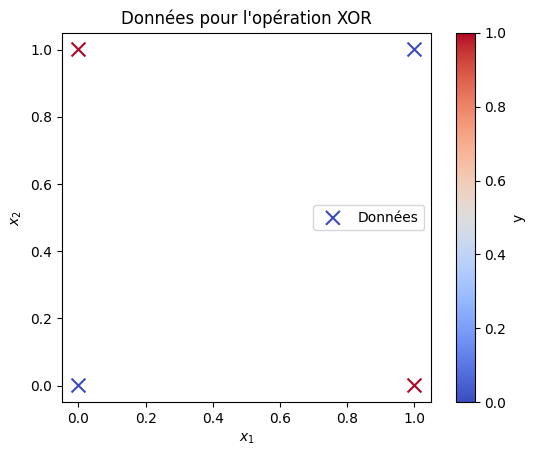

In [36]:
X = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y = torch.tensor([0.0, 1.0, 1.0, 0.0])
Y = y.unsqueeze(1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='x', label="Données",cmap="coolwarm")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("square")
plt.title("Données pour l'opération XOR")
plt.colorbar(label="y")
plt.legend()
plt.show()

Nous avons également vu en classe que l'opération XOR ne peut être modélisée par une régression linéaire, mais peut l'être par un petit réseau neuronal contenant une couche cachée de deux neurones.

### Régression linéaire

Commençons par vérifier que la régression linéaire se comporte comme nous avons vu en classe, c'est à dire qu'elle converge vers des poids à 0 et un biais à 0.5.

**Exercice: copiez le modèle de régression linéaire ci-dessus, mais adaptez le pour accepter deux dimensions d'entrée (`in_features`)**
**Initialisez ensuite le modèle et testez le sur les données `X`. Imprimez le tenseur retourné.**

In [37]:
from torch import nn
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()
model(X)

tensor([[-0.1026],
        [-0.6725],
        [-0.7462],
        [-1.3160]], grad_fn=<AddmmBackward0>)

**Imprimez les paramètres du modèle. Le format est-il celui auquel vous vous attendiez?**

In [38]:
pprint.pprint(list(model.named_parameters()))

[('linear.weight',
  Parameter containing:
tensor([[-0.6436, -0.5699]], requires_grad=True)),
 ('linear.bias', Parameter containing:
tensor([-0.1026], requires_grad=True))]


**Copiez la boucle d'entraînement de la section précédente, mais adaptez-la à ce nouveau problème. Assurez-vous d'utiliser `Y` et non `y` pour l'entraînement! Utilisez un nombre d'itération suffisant pour que la fonction objectif semble avoir convergé à une valeur stable.**

In [39]:
model = LinearModel()

optimizer = torch.optim.SGD(model.parameters())

def loss_fn(y, ypred):
    return torch.mean((y - ypred)**2)

niter = 20_000
loss_vals = torch.empty(niter)
for i in range(niter):
    ypred = model(X)
    loss = loss_fn(Y, ypred)


    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals[i] = loss

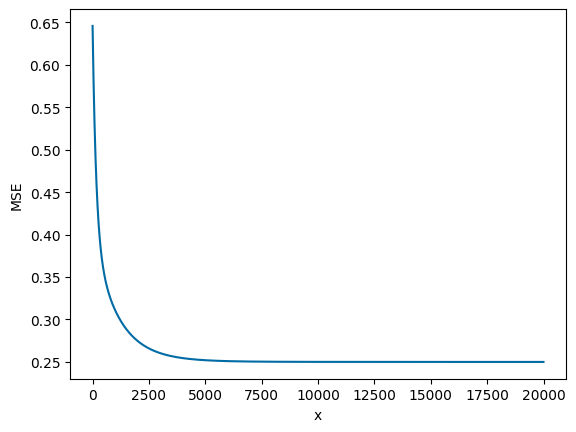

In [40]:
plt.plot(loss_vals.detach())
plt.ylabel("MSE")
plt.xlabel("x")
plt.show()

**Affichez maintenant les paramètres entraînés et la prédiction du modèle. Vous pouvez simplement l'imprimer ou la représenter sur un graphique.**

In [41]:
pprint.pprint(list(model.named_parameters()))

[('linear.weight',
  Parameter containing:
tensor([[0.0004, 0.0004]], requires_grad=True)),
 ('linear.bias', Parameter containing:
tensor([0.4995], requires_grad=True))]


In [42]:
print(model(X))

tensor([[0.4995],
        [0.4999],
        [0.4999],
        [0.5003]], grad_fn=<AddmmBackward0>)


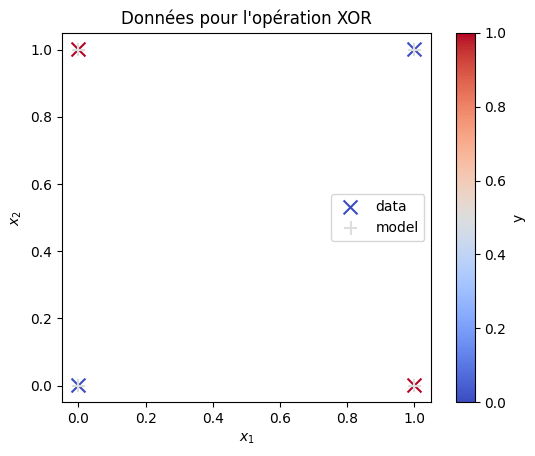

In [43]:
plt.scatter(X[:, 0], X[:, 1], marker="x", s=100, c=y, cmap="coolwarm", label="data", vmin=0.0, vmax=1)
plt.scatter(X[:, 0], X[:, 1], marker="+", s=100, c=model(X).detach(), cmap="coolwarm", label="model", vmin=0.0, vmax=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("square")
plt.title("Données pour l'opération XOR")
plt.legend()
plt.colorbar(label="y")
plt.show()

La prédiction donne le résultat vu en classe.

### Réseau neuronal simple

Essayons maintenant un réseau neuronal avec une couche cachée de deux neurones et une activation sigmoide.

**Implémentez un réseau neuronal avec l'architecture suivante**:

- Dans la fonction `__init__()`, définissez:
    - Une couche linéaire avec 2 dimensions d'entrée ($x$) et deux dimensions de sortie ($z$)
    - Une fonction d'activation sigmoide (`nn.Sigmoid`) qui donnera $h = g(z)$. Vous pouvez la créer avec `self.activation = nn.Sigmoid()`
    - Une couche linéaire avec deux dimensions d'entrée ($h$) et une dimension de sortie ($y$)
- Dans la fonction `forward()`, appelez les couches dans l'ordre et retournez la valeur y finale.

In [44]:
from torch import nn
class TinyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=2)
        self.activation = nn.Sigmoid()
        self.linear2 = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        z = self.linear1(x)
        h = self.activation(z)
        y = self.linear2(h)
        return y

**Initialisez le modèle et affichez ses paramètres**

In [45]:
model = TinyNN()
pprint.pprint(list(model.named_parameters()))

[('linear1.weight',
  Parameter containing:
tensor([[-0.1231, -0.5155],
        [-0.6279,  0.4777]], requires_grad=True)),
 ('linear1.bias',
  Parameter containing:
tensor([-0.6302,  0.6048], requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
tensor([[-0.4515,  0.2321]], requires_grad=True)),
 ('linear2.bias', Parameter containing:
tensor([-0.3630], requires_grad=True))]


**Optimisez le modèle en complétant la boucle d'optimisation ci-dessous. Affichez ensuite la fonction objectif en fonction du temps.**

Ici, l'optimiseur a été modifié pour augmenter le taux d'apprentissage (`lr` pour _learning rate_) et le momentum (que nous verrons dans les prochains cours).
La surface d'optimisation est plus complexe et ces paramètres aident à ce que le modèle converge.

In [46]:
model = TinyNN()
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

def loss_fn(y, ypred):
    return torch.mean((y - ypred)**2)

niter = 5000
loss_vals = torch.empty(niter)
for i in range(niter):
    ypred = model(X)
    loss = loss_fn(Y, ypred)


    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals[i] = loss

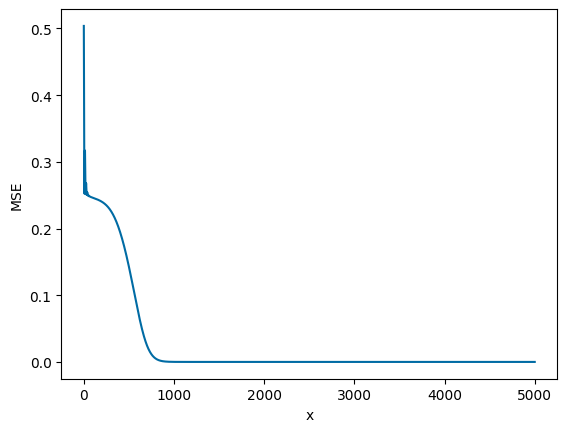

In [47]:
plt.plot(loss_vals.detach())
plt.ylabel("MSE")
plt.xlabel("x")
plt.show()

**Affichez maintenant les paramètres entraînés et la prédiction du modèle. Vous pouvez simplement l'imprimer ou la représenter sur un graphique.**

In [48]:
pprint.pprint(list(model.named_parameters())

[('linear1.weight',
  Parameter containing:
tensor([[-1.8034, -1.8008],
        [-3.0674, -3.0589]], requires_grad=True)),
 ('linear1.bias',
  Parameter containing:
tensor([2.5135, 0.4019], requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
tensor([[ 2.8646, -3.2382]], requires_grad=True)),
 ('linear2.bias', Parameter containing:
tensor([-0.7099], requires_grad=True))]


In [49]:
print(model(X))

tensor([[1.4305e-06],
        [1.0000e+00],
        [1.0000e+00],
        [4.0531e-06]], grad_fn=<AddmmBackward0>)


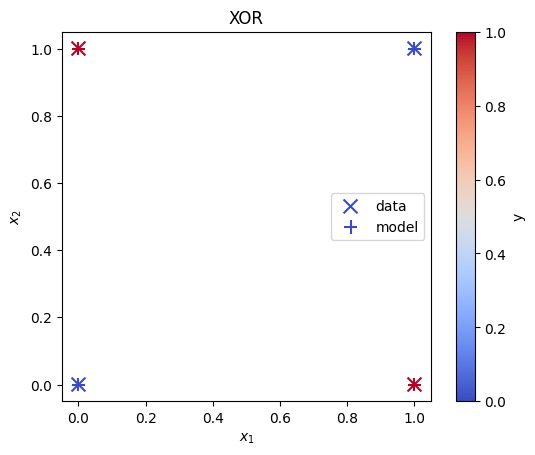

In [50]:
plt.scatter(X[:, 0], X[:, 1], marker="x", s=100, c=y, cmap="coolwarm", label="data", vmin=0.0, vmax=1)
plt.scatter(X[:, 0], X[:, 1], marker="+", s=100, c=model(X).detach(), cmap="coolwarm", label="model", vmin=0.0, vmax=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis("square")
plt.title("XOR")
plt.legend()
plt.colorbar(label="y")
plt.show()

**Utilisez `model.linear1` et `model.activation` pour obtenir les valeurs $h$ de la couche cachées. Affichez les valeurs de $y$ en fonction de $h_1$ et $h_2$. Pourquoi cette représentation améliore-t-elle la performance du modèle?**


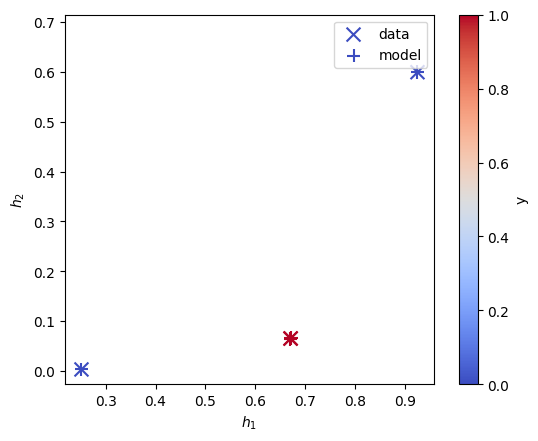

In [51]:
H = model.activation(model.linear1(X)).detach()
plt.scatter(H[:, 0], H[:, 1], marker="x", s=100, c=y, cmap="coolwarm", label="data", vmin=0.0, vmax=1)
plt.scatter(H[:, 0], H[:, 1], marker="+", s=100, c=model(X).detach(), cmap="coolwarm", label="model", vmin=0.0, vmax=1)
plt.xlabel("$h_1$")
plt.ylabel("$h_2$")
plt.axis("square")
plt.legend()
plt.colorbar(label="y")
plt.show()